# Local Electronic Structure and Dynamics of Muon-Polaron Complexes in Fe$_2$O$_3$

## Supplemental material: Convergence wrt plane-wave cutoff and k-point sampling

M. H. Dehn$^{1, 2, 3}$ J. K. Shenton$^{4,*}$ D. J. Arseneau$^3$ W. A. MacFarlane$^{2, 3, 5}$ G.
D. Morris$^3$ A. Maigné$^2$ N. A. Spaldin$^4$, and R. F. Kiefl$^{1, 2, 3}$


$^1$Department of Physics and Astronomy, University of British Columbia, Vancouver, BC V6T 1Z1, Canada    
$^2$Stewart Blusson Quantum Matter Institute, University of British Columbia, Vancouver, BC V6T 1Z4, Canada    
$^3$<span style="font-variant:small-caps;">Triumf</span>, Vancouver, BC V6T 2A3, Canada   
$^4$Department of Materials, ETH Zurich, CH-8093 Zürich, Switzerland   
$^5$Department of Chemistry, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada    




$^*$ For queries about the supplemental information in this notebook contact [J. Kane Shenton](mailto:john.shenton@mat.ethz.ch).

## Summary


The DFT results in the paper were obtained using the LDA exchange-correlation functional with a Hubbard correction of $\mathrm{U_{eff}}=4$ eV applied to the Fe $d$ orbitals. A plane-wave cutoff energy of 700 eV was used. For the 2x2x2 supercell, a $\Gamma$-centred 4x4x4 k-point mesh was used for the structural relaxations$^*$ and a $\Gamma$-centred 8x8x8 k-point mesh was used for the density of states calculations. Further computational details can be found in the notebook: `Muon-site-summary.ipynb`

Below we present the results of some tests for convergence of energy and structure of pristine Fe$_2$O$_3$ (in the primitive 10-atom rhombohedral unit cell) with respect to plane-wave cutoff and k-point sampling. For interest, we also include tests using the PBEsol functional. A $\mathrm{U_{eff}}$ of 4 eV was used throughout. For information on the effect of $\mathrm{U_{eff}}$ on the results in the paper, see the jupyter notebook named `muons_wrt_U.ipynb`.

Here we find that:

1. Forces are converged to < ~1 meV/Å using the parameters used in the paper.
2. The LDA+U approach reproduces the experimental lattice constant and rhombohedral angle to within 1.5% of the low-temperature neutron diffraction finding of [Baron et al](http://doi.org/10.1016/j.solidstatesciences.2004.11.021).
3. As expected, PBEsol+U generally better captures the structure of Fe$_2$O$_3$ than LDA+U.



$^*$Structures were relaxed such that the maximum force did not exceed 5 meV/Å. 

## Setup

In [1]:
# ASE version 3.19.1
from ase.io import read

# Numpy version 1.16.4
import numpy as np

# re version: 2.2.1
import re

# pymatgen version: '2020.6.8'
from pymatgen.io.vasp import Vasprun

# matplotlib version: 3.2.2
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
mpl.style.use('seaborn-poster')


markers = {'lda': 's',
           'pbesol' : 'o'}

In order make the repository more manageable in size, I have compressed all of the VASP output files needed for this analysis. To uncompress the files, run the cell below.

In [37]:
# compress files to make git repo size reasonable:
# !gzip -r convergence_tests/planewave-cutoff/*
# !gzip -r convergence_tests/k-points/*

# decompress files needed for analysis:
!gzip -dr convergence_tests/planewave-cutoff/*
!gzip -dr convergence_tests/k-points/*

## Experimental parameters:

Taking the 10K structure of Baron et al (neutron, powder):   
[Solid State Sciences (2005) 7, (*) p753-p759](http://doi.org/10.1016/j.solidstatesciences.2004.11.021)

In [4]:
experimental_a = 5.4195 #ang.
experimental_alpha = 55.282 # deg.


## Plane-wave cutoff (ENCUT)

### Read in all vasprun files

In [5]:
functionals = ['lda', 'pbesol']
encuts = [400, 500 ,550, 600, 650, 700, 750, 800, 900]

E_encut_runs = {}
# Loop over functionals
for xc in functionals:
    runs_encut = []
    # loop over enucts
    for encut in encuts:
        print(f"xc: {xc}, ENCUT: {encut} eV")
        directory = f'./convergence_tests/planewave-cutoff/{xc}/encut-{encut}/scf/'
        
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False)
        
        runs_encut.append(run)
        
    E_encut_runs[xc] = runs_encut

xc: lda, ENCUT: 400 eV
xc: lda, ENCUT: 500 eV
xc: lda, ENCUT: 550 eV
xc: lda, ENCUT: 600 eV
xc: lda, ENCUT: 650 eV
xc: lda, ENCUT: 700 eV
xc: lda, ENCUT: 750 eV
xc: lda, ENCUT: 800 eV
xc: lda, ENCUT: 900 eV
xc: pbesol, ENCUT: 400 eV
xc: pbesol, ENCUT: 500 eV
xc: pbesol, ENCUT: 550 eV
xc: pbesol, ENCUT: 600 eV
xc: pbesol, ENCUT: 650 eV
xc: pbesol, ENCUT: 700 eV
xc: pbesol, ENCUT: 750 eV
xc: pbesol, ENCUT: 800 eV
xc: pbesol, ENCUT: 900 eV


#### Plot: total energies

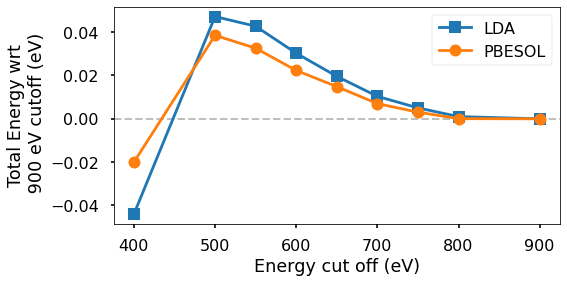

In [30]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(8,4))


ax.axhline(0, linewidth=2, linestyle = '--', color = '0.75')
for xc in functionals:
    totens = np.array([run.final_energy for run in E_encut_runs[xc]])
    ax.plot(encuts, totens - totens[-1], marker=markers[xc],label=f'{xc.upper()}', markersize=12)

ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel('Total Energy wrt\n 900 eV cutoff (eV)')

ax.legend();

#### Plot Lattice parameters

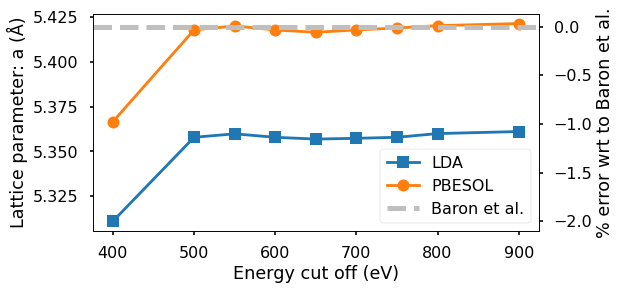

In [17]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(8,4))


for xc in functionals:
    a = np.array([run.final_structure.lattice.a for run in E_encut_runs[xc]])
    ax.plot(encuts, a, marker=markers[xc],label=f'{xc.upper()}', markersize=12)
    
# experimental line:
ax.axhline(experimental_a, linewidth=5, linestyle = '--', color = '0.75', label='Baron et al.')

ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel('Lattice parameter: a (Å)')

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_a) / experimental_a
y2_rel = 100*(y2 - experimental_a) / experimental_a

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Baron et al.')

ax.legend();

#### Plot lattice angle

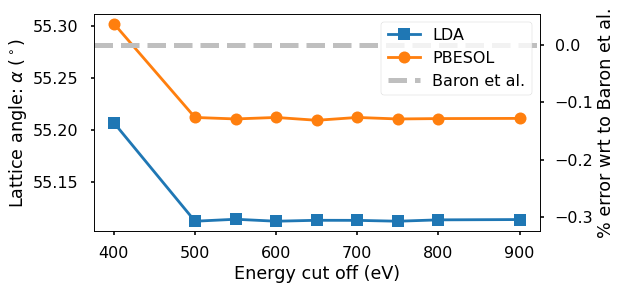

In [18]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(8,4))

for xc in functionals:
    alpha = np.array([run.final_structure.lattice.alpha for run in E_encut_runs[xc]])
    ax.plot(encuts, alpha, marker=markers[xc],label=f'{xc.upper()}', markersize=12)
    
# experimental line:
ax.axhline(experimental_alpha, linewidth=5, linestyle = '--', color = '0.75', label='Baron et al.')

ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel(r'Lattice angle: $\alpha$ ($^\circ$)')

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_alpha) / experimental_alpha
y2_rel = 100*(y2 - experimental_alpha) / experimental_alpha

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Baron et al.')

ax.legend();

#### Plot forces

xc: lda, ENCUT: 400 eV
xc: lda, ENCUT: 500 eV
xc: lda, ENCUT: 550 eV
xc: lda, ENCUT: 600 eV
xc: lda, ENCUT: 650 eV
xc: lda, ENCUT: 700 eV
xc: lda, ENCUT: 750 eV
xc: lda, ENCUT: 800 eV
xc: lda, ENCUT: 900 eV
xc: pbesol, ENCUT: 400 eV
xc: pbesol, ENCUT: 500 eV
xc: pbesol, ENCUT: 550 eV
xc: pbesol, ENCUT: 600 eV
xc: pbesol, ENCUT: 650 eV
xc: pbesol, ENCUT: 700 eV
xc: pbesol, ENCUT: 750 eV
xc: pbesol, ENCUT: 800 eV
xc: pbesol, ENCUT: 900 eV


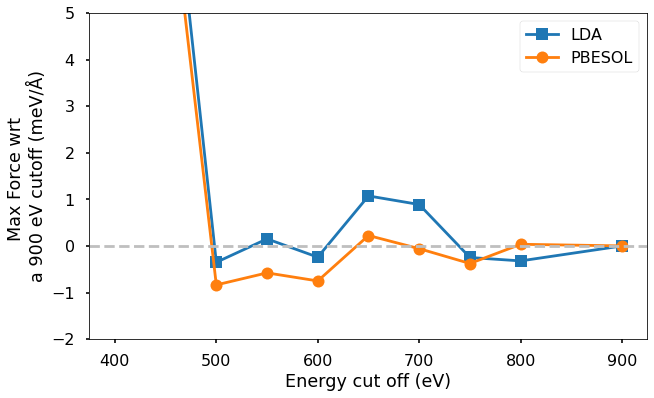

In [19]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(10,6))

for xc in functionals:
    maxforces_encut = []
    for encut in encuts:
        print(f"xc: {xc}, ENCUT: {encut} eV")
        directory = f'./convergence_tests/planewave-cutoff/{xc}/encut-{encut}/geom-1/'
        # read in vasprun.xml
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False, exception_on_bad_xml=False)
        
        # extract forces
        forces = run.ionic_steps[0]['forces']

        # get max force and convert to meV/A with factor of 1000
        max_force = 1000*np.linalg.norm(forces, axis=1).max() # convert to meV/A

        # append max force to list
        maxforces_encut.append(max_force)
                
    # plot !    
    ax.plot(encuts,
            np.array(maxforces_encut) - maxforces_encut[-1],
            marker=markers[xc],
            label=f'{xc.upper()}',
            markersize=12)
    
    
ax.set_xlabel('Energy cut off (eV)')
ax.set_ylabel('Max Force wrt \na 900 eV cutoff (meV/Å)')

ax.legend()

ax.set_ylim([-2,5])
ax.axhline(0, linestyle = '--', color='0.75');

## k-points

### Read in all vasprun files

In [20]:
functionals = ['lda', 'pbesol']
kpts_range = range(2,8)

E_kpt_runs = {}

# Loop over functionals
for xc in functionals:
    runs_kpt = []
    # Loop over kpts
    for k in kpts_range:
        print(f"xc: {xc}, kpoint: {k}x{k}x{k}")
        directory = f'./convergence_tests/k-points/{xc}/k-{k}x{k}x{k}/scf/'
        
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False)
        
        runs_kpt.append(run)
        
    E_kpt_runs[xc] = runs_kpt

xc: lda, kpoint: 2x2x2
xc: lda, kpoint: 3x3x3
xc: lda, kpoint: 4x4x4
xc: lda, kpoint: 5x5x5
xc: lda, kpoint: 6x6x6
xc: lda, kpoint: 7x7x7
xc: pbesol, kpoint: 2x2x2
xc: pbesol, kpoint: 3x3x3
xc: pbesol, kpoint: 4x4x4
xc: pbesol, kpoint: 5x5x5
xc: pbesol, kpoint: 6x6x6
xc: pbesol, kpoint: 7x7x7


### Plot: total energies

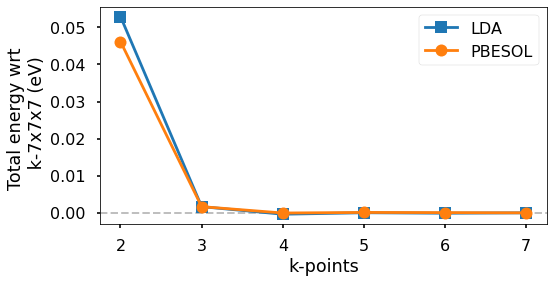

In [32]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(8,4))
ax.axhline(0, linewidth=2, linestyle = '--', color = '0.75')
for xc in functionals:
    totens = np.array([run.final_energy for run in E_kpt_runs[xc]])
    ax.plot(kpts_range, totens - totens[-1], marker=markers[xc],label=f'{xc.upper()}', markersize=12)
    
ax.set_xlabel('k-points')
ax.set_ylabel('Total energy wrt \n k-7x7x7 (eV)')
ax.legend();

### Plot Lattice parameter

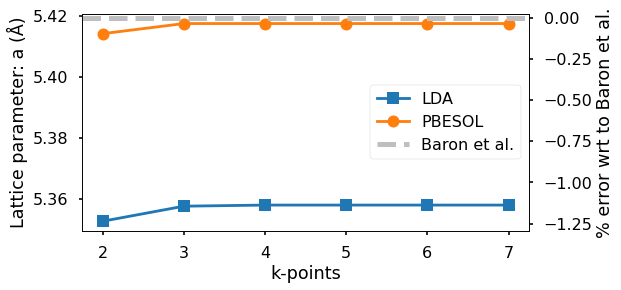

In [22]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(8,4))

for xc in functionals:
    a = np.array([run.final_structure.lattice.a for run in E_kpt_runs[xc]])
    ax.plot(kpts_range, a, marker=markers[xc],label=f'{xc.upper()}', markersize=12)
    
# experimental line:
ax.axhline(experimental_a, linewidth=5, linestyle = '--', color = '0.75', label='Baron et al.')

ax.set_xlabel('k-points')
ax.set_ylabel('Lattice parameter: a (Å)')

# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_a) / experimental_a
y2_rel = 100*(y2 - experimental_a) / experimental_a

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Baron et al.')

ax.legend();

### Plot lattice angle

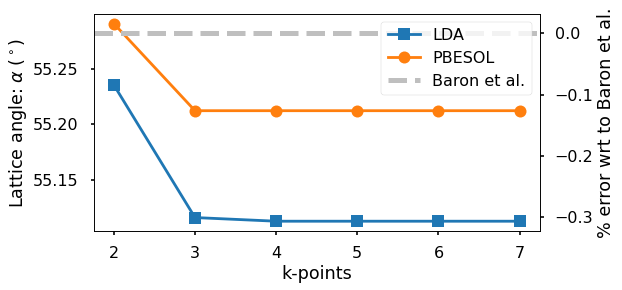

In [23]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(8,4))


for xc in functionals:
    alpha = np.array([run.final_structure.lattice.alpha for run in E_kpt_runs[xc]])
    ax.plot(kpts_range, alpha, marker=markers[xc],label=f'{xc.upper()}', markersize=12)
    
# experimental line:
ax.axhline(experimental_alpha, linewidth=5, linestyle = '--', color = '0.75', label='Baron et al.')

ax.set_xlabel('k-points')
ax.set_ylabel(r'Lattice angle: $\alpha$ ($^\circ$)')


# show the % error wrt experiment on the right:
y1, y2=ax.get_ylim()
ax2=ax.twinx()
y1_rel = 100*(y1 - experimental_alpha) / experimental_alpha
y2_rel = 100*(y2 - experimental_alpha) / experimental_alpha

ax2.set_ylim(y1_rel, y2_rel)
ax2.set_ylabel('% error wrt to Baron et al.')
ax.legend();

### Plot forces

xc: lda, kpts: 2x2x2
xc: lda, kpts: 3x3x3
xc: lda, kpts: 4x4x4
xc: lda, kpts: 5x5x5
xc: lda, kpts: 6x6x6
xc: lda, kpts: 7x7x7
xc: pbesol, kpts: 2x2x2
xc: pbesol, kpts: 3x3x3
xc: pbesol, kpts: 4x4x4
xc: pbesol, kpts: 5x5x5
xc: pbesol, kpts: 6x6x6
xc: pbesol, kpts: 7x7x7


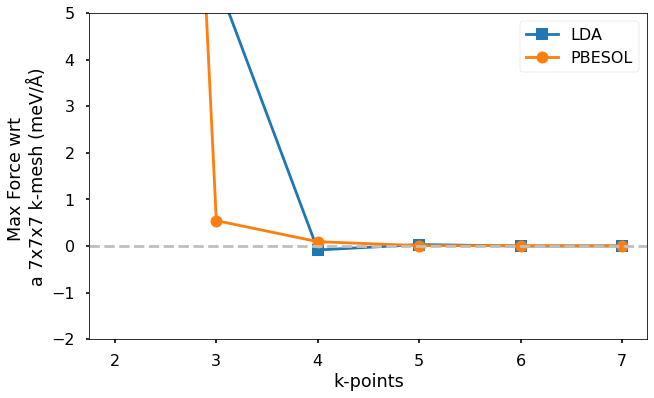

In [25]:
### --- Plot ---###
fig, ax = plt.subplots(figsize=(10,6))

for xc in functionals:
    maxforces_kpts = []
    for k in kpts_range:
        print(f"xc: {xc}, kpts: {k}x{k}x{k}")
        directory = f'./convergence_tests/k-points/{xc}/k-{k}x{k}x{k}/geom-1/'
        # read in vasprun.xml
        run = Vasprun(directory + 'vasprun.xml', parse_potcar_file=False, exception_on_bad_xml=False)
        # extract the forces
        forces = run.ionic_steps[0]['forces']
        # get the maximum force
        max_force = 1000*np.linalg.norm(forces, axis=1).max() # convert to meV/A
        # append to max force list
        maxforces_kpts.append(max_force)
                
    # plot !    
    ax.plot(kpts_range,
            np.array(maxforces_kpts) - maxforces_kpts[-1],
            marker=markers[xc],
            label=f'{xc.upper()}',
            markersize=12)
ax.set_xlabel('k-points')
ax.set_ylabel('Max Force wrt \na 7x7x7 k-mesh (meV/Å)')
ax.legend()

ax.set_ylim([-2,5])
ax.axhline(0, linestyle = '--', color='0.75');